<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataAnalysis/blob/master/DataAnalysis7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
fb = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Ch4/fb_2018.csv',index_col = 'date',parse_dates=True).assign(
    trading_volume = lambda x:pd.cut(x.volume,bins=3,labels=['low','med','high'])
)

weather = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Ch4/weather_by_station.csv',index_col='date',parse_dates=True)

In [3]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,1.714318e+02,1.751438e+02,1.681567e+02
high,1.734610e+02,1.794200e+02,1.704767e+02
low,1.693063e+02,1.721075e+02,1.615733e+02
open,1.713556e+02,1.758181e+02,1.677267e+02
volume,2.454721e+07,7.907256e+07,1.419240e+08


In [4]:
weather.reset_index().pivot_table(
    index=['date','station','station_name'],
    columns='datatype',
    values='value',
    aggfunc = 'median'
).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.0,NaN,NaN,2052.0,28.7,NaN,NaN,...,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.9,0.0,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.7,NaN,NaN,1954.0,29.2,NaN,NaN,...,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.7,NaN,NaN,2212.0,24.4,NaN,NaN,...,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.1,NaN,NaN,NaN,31.2,0.0,0.0,...,12.5,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.crosstab(
    index=fb.trading_volume,columns=fb.index.month,
    colnames=['months']
)

months,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [6]:
pd.crosstab(
    index=fb.trading_volume,columns=fb.index.month,
    colnames=['month'],values=fb.close,aggfunc= np.mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.2425,180.269474,177.067333,163.293,182.93,195.267619,201.916111,177.491957,164.377368,154.187826,141.635714,137.161053
med,179.3700,NaN,164.765000,174.160,NaN,NaN,194.280000,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.105000,NaN,NaN,NaN,176.260000,NaN,NaN,NaN,NaN,NaN


In [7]:
snow_data = weather.query('datatype=="SNOW"')
pd.crosstab(index=snow_data.station_name,
            columns=snow_data.index.month,
            colnames=['month'],
            values=snow_data.value,
            aggfunc=lambda x:(x>0).sum(),
            margins = True,
            margins_name='total observations fo snow')

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations fo snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
"AMITYVILLE 0.1 WSW, NY US",1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
"AMITYVILLE 0.6 NNE, NY US",3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
"ARMONK 0.3 SE, NY US",6.0,4.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.0,0.0,4.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7


In [8]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


In [9]:
fb.loc['2018-q1'].equals(fb['2018-01':'2018-03'])

True

In [10]:
fb.first('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


In [11]:
fb.last('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [12]:
fb_reindexed = fb.reindex(
    pd.date_range('2018-01-01','2018-12-31',freq='D')
)

In [13]:
fb_reindexed.first('1D').isna().squeeze().all()

True

In [14]:
melted_stock_data = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Ch4/melted_stock_data.csv',index_col='date',parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


In [16]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


In [17]:
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


In [18]:
#VISUALIZATION OF DATA
import matplotlib.pyplot as plt

In [19]:
fb = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/fb_stock_prices_2018.csv',index_col='date',parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [20]:
fb.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

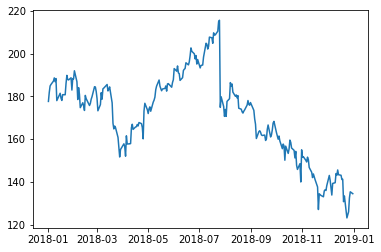

In [21]:
plt.plot(fb.index,fb.open)
plt.show()

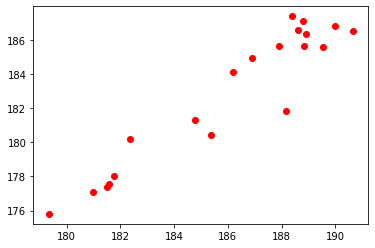

In [24]:
plt.plot('high','low','or',data=fb.head(20))

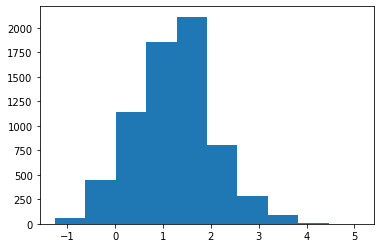

In [26]:
#Histogram
quakes = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/earthquakes.csv')
plt.hist(quakes.query('magType=="ml"').mag)
plt.show()

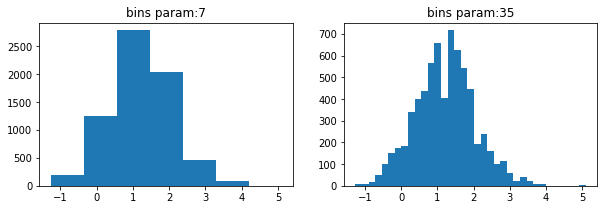

In [27]:
x = quakes.query('magType=="ml"').mag
fig,axes = plt.subplots(1,2,figsize=(10,3))
for ax,bins in zip(axes,[7,35]):
  ax.hist(x,bins=bins)
  ax.set_title(f'bins param:{bins}')

In [28]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

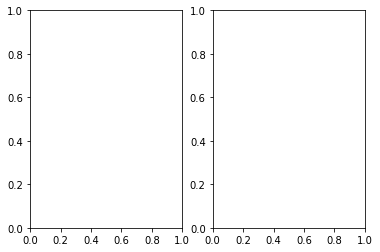

In [29]:
fig,axes = plt.subplots(1,2)

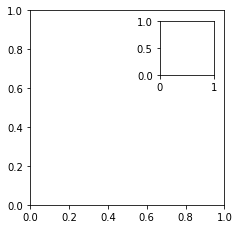

In [30]:
fig = plt.figure(figsize=(3,3))
outside = fig.add_axes([0.1,0.1,0.9,0.9])
inside = fig.add_axes([0.7,0.7,0.25,0.25])

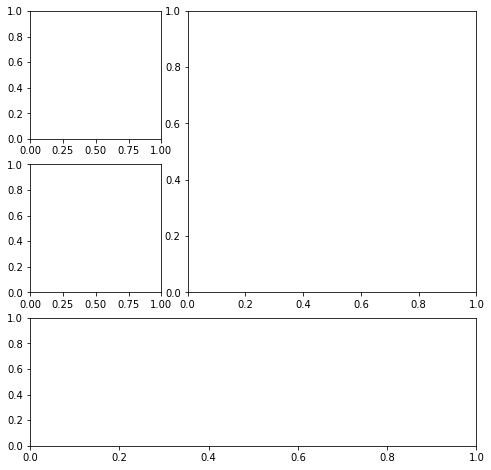

In [31]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(3,3)
top_left = fig.add_subplot(gs[0,0])
mid_left = fig.add_subplot(gs[1,0])
top_right = fig.add_subplot(gs[:2,1:])
bottom=fig.add_subplot(gs[2,:])

<Figure size 720x288 with 0 Axes>

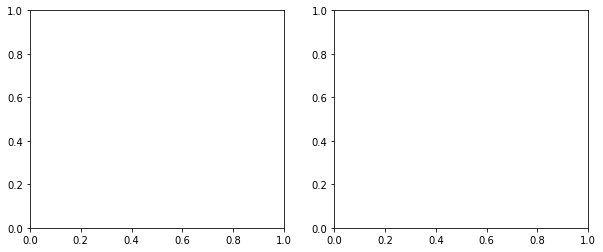

In [33]:
#Additional Options
fig = plt.figure(figsize=(10,4))
fig,axes = plt.subplots(1,2,figsize=(10,4))
plt.show()

In [34]:
import random
import matplotlib as mpl

In [36]:
rcparams_list = list(mpl.rcParams.keys())
random.seed(20)
random.shuffle(rcparams_list)

In [37]:
sorted(rcparams_list[:20])

['animation.avconv_args',
 'axes.axisbelow',
 'axes.formatter.limits',
 'boxplot.capprops.color',
 'boxplot.meanprops.marker',
 'boxplot.whiskerprops.color',
 'figure.dpi',
 'image.interpolation',
 'lines.dash_joinstyle',
 'lines.markersize',
 'lines.solid_capstyle',
 'markers.fillstyle',
 'mpl_toolkits.legacy_colorbar',
 'savefig.transparent',
 'scatter.edgecolors',
 'text.latex.preview',
 'xtick.color',
 'xtick.labelbottom',
 'xtick.top',
 'ytick.major.right']

In [38]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

In [39]:
mpl.rcParams['figure.figsize']=(300,10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

In [40]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [66]:
fb = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/fb_stock_prices_2018.csv',index_col='date',parse_dates=True)
quakes = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/earthquakes.csv')
covid = pd.read_csv('/content/drive/MyDrive/DataAnalysis/chp5/covid19_cases.csv').assign(
    date = lambda x:pd.to_datetime(x.dateRep,format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America','USA'
).sort_index()['2021-01-18':'2020-09-18']

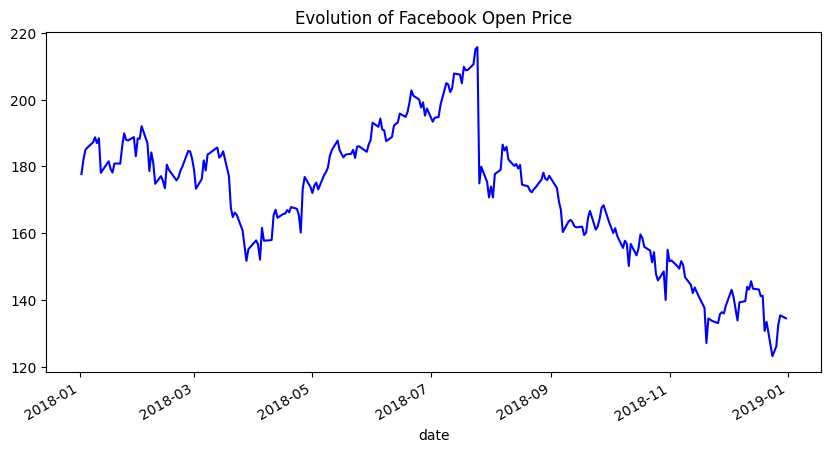

In [44]:
fb.plot(
    kind='line',y='open',figsize=(10,5),style='-b',
    legend=False,title='Evolution of Facebook Open Price'
)

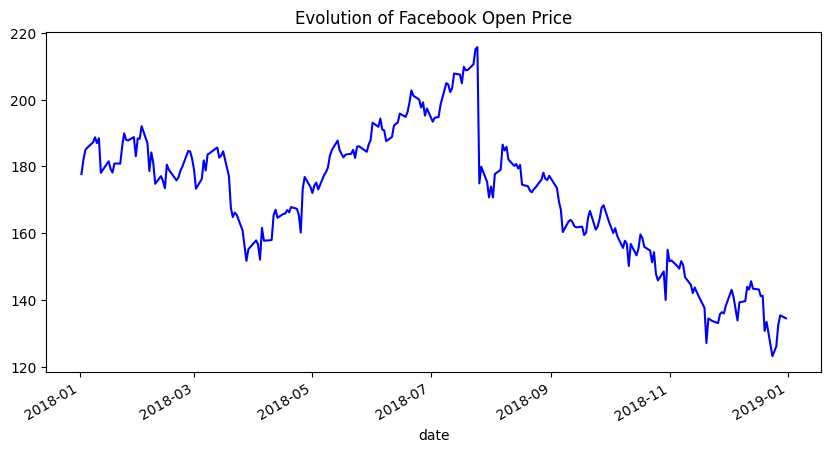

In [45]:
fb.plot(
    kind='line',y='open',figsize=(10,5),
    color='blue',linestyle='solid',
    legend=False,title='Evolution of Facebook Open Price'
)

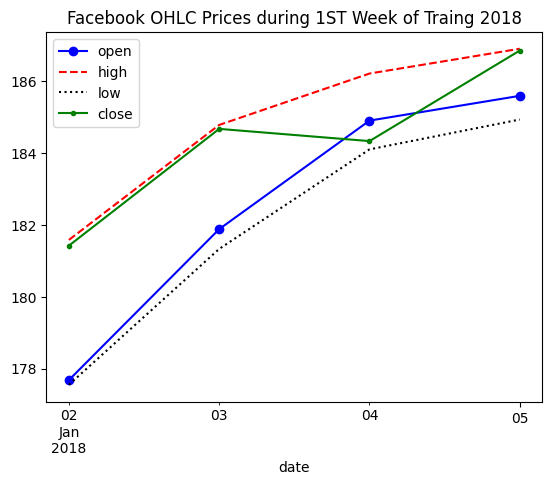

In [49]:
fb.first('1W').plot(
    y=['open','high','low','close'],
    style=['o-b','--r',':k','.-g'],
    title='Facebook OHLC Prices during 1ST Week of Traing 2018'
).autoscale()

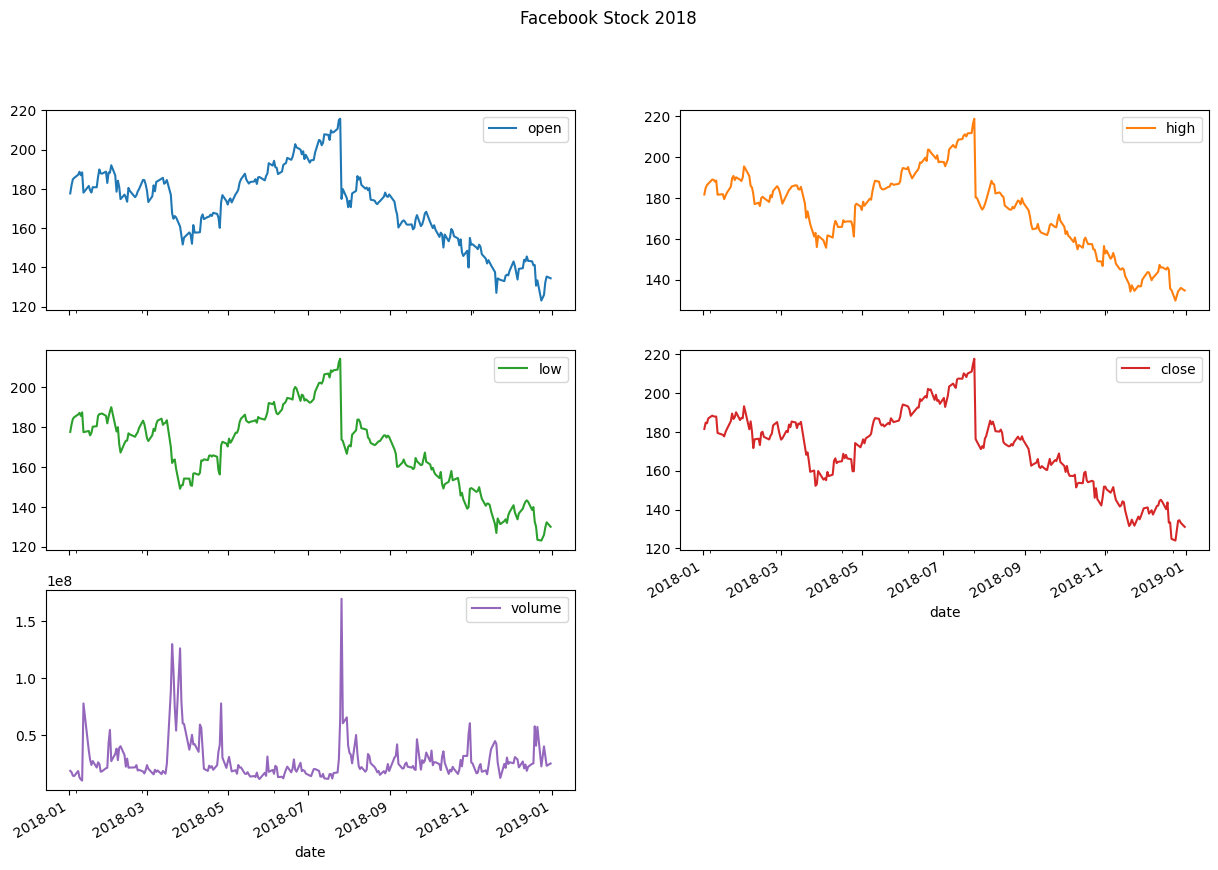

In [51]:
fb.plot(
    kind='line',subplots=True,layout=(3,2),figsize=(15,10),title='Facebook Stock 2018'
)
plt.show()

In [69]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index,
    columns='countriesAndTerritories',
     values='cases'
 ).rolling(7).mean()